In [1]:
import pandas as pd 
import numpy as np 
import subprocess
import matplotlib.pyplot as plt 
from IPython.display import SVG

In [2]:
results = pd.read_csv("../otherScripts/hpsweep/sweepResults.txt")
results

,t_sr,t_stdp,t_stdp_asymm,a_stdp_asymm,f,k,R_10_w,R_10_nw,SNR_10_w,SNR_10_nw,R_60_w,R_60_nw,SNR_60_w,SNR_60_nw
0,4.0,0.03,1.5,-0.45,0.6,1.5,0.79816,0.67205,17.25799,9.15471,0.85204,0.75799,45.08842,21.43578
1,5.0,0.03,2.0,-0.45,0.8,1.5,0.47309,0.29141,20.10098,3.12971,0.49815,0.66122,48.08517,7.32255
2,4.0,0.02,2.0,-0.40,0.8,1.0,0.68304,0.42705,12.16164,4.83307,0.76517,0.69620,29.97645,11.56846
3,4.0,0.02,2.5,-0.50,0.8,1.5,0.05264,0.43985,18.82542,5.58010,0.05461,0.62427,44.84797,14.12164
4,4.0,0.02,2.0,-0.50,0.8,1.0,0.27182,0.00066,11.68086,1.15555,0.32164,0.00617,26.34306,1.86176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,4.0,0.02,2.5,-0.40,0.6,1.5,0.45093,0.00162,15.97337,1.62119,0.49751,0.01103,40.76763,2.30043
194,4.0,0.03,1.5,-0.40,0.6,1.5,0.85744,0.69997,17.00089,11.50816,0.90295,0.75023,42.44884,27.17459
195,4.0,0.02,2.0,-0.50,0.6,1.5,0.39355,0.00001,16.53323,0.90151,0.43267,0.00003,38.98950,1.72712
196,4.0,0.02,2.0,-0.45,0.6,1.0,0.56282,0.21450,10.12282,2.74013,0.69788,0.54546,23.43992,6.40785


In [4]:
results.sort_values('R_60_nw')[::-1]


,t_sr,t_stdp,t_stdp_asymm,a_stdp_asymm,f,k,R_10_w,R_10_nw,SNR_10_w,SNR_10_nw,R_60_w,R_60_nw,SNR_60_w,SNR_60_nw
159,4.0,0.03,2.0,-0.40,0.6,1.0,0.77007,0.57058,11.19376,6.07379,0.86860,0.75967,26.40308,13.92780
174,4.0,0.03,1.5,-0.40,0.8,1.5,0.79129,0.68949,20.81275,11.05042,0.82957,0.75853,49.57562,27.35887
0,4.0,0.03,1.5,-0.45,0.6,1.5,0.79816,0.67205,17.25799,9.15471,0.85204,0.75799,45.08842,21.43578
11,4.0,0.03,1.5,-0.45,0.6,1.0,0.85978,0.66964,12.19864,9.16762,0.93422,0.75771,31.59242,22.02310
135,4.0,0.03,2.0,-0.40,0.8,1.0,0.70528,0.54766,12.36217,5.53138,0.79293,0.75767,29.19482,14.31561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,5.0,0.02,2.0,-0.50,0.6,1.5,0.41795,0.00017,16.56132,0.67333,0.45488,0.00177,38.67649,1.60955
91,5.0,0.02,2.0,-0.50,0.8,0.5,0.09351,0.00262,3.86629,1.38164,0.23672,0.00171,8.28566,2.04503
71,4.0,0.02,2.0,-0.50,0.8,1.5,0.29009,0.00089,18.45348,1.23159,0.32296,0.00158,47.39729,1.82809
86,5.0,0.02,2.0,-0.50,0.6,0.5,0.10907,0.00022,3.94743,1.46928,0.29996,0.00144,8.60349,1.87734


In [15]:
sortedResults = results.sort_values('area')
for i in range(20):
    kappa = int(1000*sortedResults['kappa'].iloc[i])
    tau_sr = int(1000*sortedResults['tau_sr'].iloc[i])
    tau_stdp = int(1000*sortedResults['tau_stdp'].iloc[i])
    asymm = int(1000*sortedResults['asymm'].iloc[i])
    frac = int(1000*sortedResults['frac'].iloc[i])
    figpath = "../figures/clusterSweep/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    print(figpath)
    !cp $figpath ../figures/clusterSweep/top10
    newfigpath =   "../figures/clusterSweep/top10/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    newerfigpath = "../figures/clusterSweep/top10/%g_%g_%g_%g_%g_%g.svg" %(i+1,kappa,tau_sr,tau_stdp,asymm,frac)
    # !mv $newfigpath newerfigpath

../figures/clusterSweep/50_5000_30_980_600.svg
../figures/clusterSweep/50_4000_25_980_600.svg
../figures/clusterSweep/10_5000_25_980_600.svg
../figures/clusterSweep/50_5000_30_980_800.svg
../figures/clusterSweep/10_4000_30_980_700.svg
../figures/clusterSweep/10_4000_25_980_600.svg
../figures/clusterSweep/10_4000_30_980_800.svg
../figures/clusterSweep/50_5000_25_980_600.svg
../figures/clusterSweep/10_4000_25_980_700.svg
../figures/clusterSweep/50_4000_25_980_700.svg
../figures/clusterSweep/200_4000_30_950_700.svg
../figures/clusterSweep/10_5000_25_980_700.svg
../figures/clusterSweep/10_5000_30_980_800.svg
../figures/clusterSweep/200_4000_25_950_700.svg
../figures/clusterSweep/50_4000_25_980_800.svg
../figures/clusterSweep/10_4000_30_980_600.svg
../figures/clusterSweep/10_4000_25_980_800.svg
../figures/clusterSweep/50_5000_25_980_700.svg
../figures/clusterSweep/50_4000_30_950_700.svg
../figures/clusterSweep/200_4000_25_950_600.svg


In [16]:
sortedResults = results.sort_values('area')
for i in range(20):
    kappa = int(1000*sortedResults['kappa'].iloc[-i])
    tau_sr = int(1000*sortedResults['tau_sr'].iloc[-i])
    tau_stdp = int(1000*sortedResults['tau_stdp'].iloc[-i])
    asymm = int(1000*sortedResults['asymm'].iloc[-i])
    frac = int(1000*sortedResults['frac'].iloc[-i])
    figpath = "../figures/clusterSweep/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    print(figpath)
    !cp $figpath ../figures/clusterSweep/bottom10
    newfigpath =   "../figures/clusterSweep/bottom10/%g_%g_%g_%g_%g.svg" %(kappa,tau_sr,tau_stdp,asymm,frac)
    newerfigpath = "../figures/clusterSweep/bottom10/%g_%g_%g_%g_%g_%g.svg" %(i+1,kappa,tau_sr,tau_stdp,asymm,frac)
    # !mv $newfigpath newerfigpath

../figures/clusterSweep/50_5000_30_980_600.svg
../figures/clusterSweep/1000_5000_25_980_800.svg
../figures/clusterSweep/1000_5000_30_980_800.svg
../figures/clusterSweep/1000_4000_30_980_800.svg
../figures/clusterSweep/1000_4000_25_980_700.svg
../figures/clusterSweep/1000_5000_25_980_700.svg
../figures/clusterSweep/1000_5000_30_980_700.svg
../figures/clusterSweep/1000_5000_25_980_600.svg
../figures/clusterSweep/1000_4000_30_980_600.svg
../figures/clusterSweep/1000_5000_30_980_600.svg
../figures/clusterSweep/1000_4000_25_950_800.svg
../figures/clusterSweep/1000_5000_25_950_800.svg
../figures/clusterSweep/1000_5000_30_950_800.svg
../figures/clusterSweep/1000_4000_30_950_800.svg
../figures/clusterSweep/1000_5000_25_950_700.svg
../figures/clusterSweep/1000_4000_25_950_700.svg
../figures/clusterSweep/1000_5000_30_950_700.svg
../figures/clusterSweep/500_5000_25_980_800.svg
../figures/clusterSweep/1000_4000_30_950_700.svg
../figures/clusterSweep/500_4000_30_980_800.svg


(array([ 4.,  4.,  5.,  7.,  3.,  1.,  7.,  2.,  3.,  5.,  6.,  5.,  5.,
         4.,  6., 13.,  5.,  0.,  3.,  8.,  7.,  6.,  5.,  7.,  4.,  5.,
         5.,  4.,  2.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  1.,  2.,  1.,
         1.,  3.,  1.,  3.,  0.,  1.,  0.,  3.,  0.,  1.,  1.,  0.,  3.,
         2.,  0.,  2.,  1.,  1.,  2.,  0.,  1.,  2.,  2.,  2.,  3.,  0.,
         2.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  2.,  1.]),
 array([0.18256  , 0.1907528, 0.1989456, 0.2071384, 0.2153312, 0.223524 ,
        0.2317168, 0.2399096, 0.2481024, 0.2562952, 0.264488 , 0.2726808,
        0.2808736, 0.2890664, 0.2972592, 0.305452 , 0.3136448, 0.3218376,
        0.3300304, 0.3382232, 0.346416 , 0.3546088, 0.3628016, 0.3709944,
        0.3791872, 0.38738  , 0.3955728, 0.4037656, 0.4119584, 0.4201512,
        0.428344 , 0.4365368, 0.4447296, 0.4529224, 0.4611152, 0

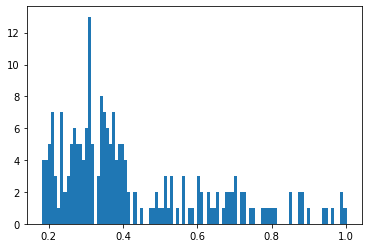

In [14]:
plt.hist(results['area'],bins=100)

In [9]:
#Global best params 
id_R2 = results['R2'].argsort()[::-1][0]
id_skill = results['skill'].argsort()[::-1][0]
id_area = results['area'].argsort()[0]
id_L2 = results['L2'].argsort()[0]

print("            kappa             tau_stdp      tau_sr          asymm             frac")
print("R2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_R2].mean(),results['tau_stdp'][id_R2].mean(),results['tau_sr'][id_R2].mean(),results['asymm'][id_R2].mean(),results['frac'][id_R2].mean()))
print("skill:      %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_skill].mean(),results['tau_stdp'][id_skill].mean(),results['tau_sr'][id_skill].mean(),results['asymm'][id_skill].mean(),results['frac'][id_skill].mean()))
print("area:       %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_area].mean(),results['tau_stdp'][id_area].mean(),results['tau_sr'][id_area].mean(),results['asymm'][id_area].mean(),results['frac'][id_area].mean()))
print("L2:         %.2f              %.2f          %.2f            %.2f              %.2f" %(results['kappa'][id_L2].mean(),results['tau_stdp'][id_L2].mean(),results['tau_sr'][id_L2].mean(),results['asymm'][id_L2].mean(),results['frac'][id_L2].mean()))


#And for each tau_sr

            kappa             tau_stdp      tau_sr          asymm             frac
R2:         2.00              0.02          2.00            0.90              0.80
skill:      2.00              0.02          4.00            0.90              0.80
area:       0.50              0.03          4.00            0.90              0.60
L2:         0.50              0.03          4.00            0.90              0.60


In [10]:
top = 5

id_R2 = results['R2'].argsort()[::-1][:top]
id_skill = results['skill'].argsort()[::-1][:top]
id_area = results['area'].argsort()[:top]
id_L2 = results['L2'].argsort()[:top]

print("            kappa             tau_stdp          asymm             frac")
print("R2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_R2].mean(),results['kappa'][id_R2].std(),results['tau_stdp'][id_R2].mean(),results['tau_stdp'][id_R2].std(),results['asymm'][id_R2].mean(),results['asymm'][id_R2].std(),results['frac'][id_R2].mean(),results['frac'][id_R2].std()))
print("skill:      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_skill].mean(),results['kappa'][id_skill].std(),results['tau_stdp'][id_skill].mean(),results['tau_stdp'][id_skill].std(),results['asymm'][id_skill].mean(),results['asymm'][id_skill].std(),results['frac'][id_skill].mean(),results['frac'][id_skill].std()))
print("area:       %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_area].mean(),results['kappa'][id_area].std(),results['tau_stdp'][id_area].mean(),results['tau_stdp'][id_area].std(),results['asymm'][id_area].mean(),results['asymm'][id_area].std(),results['frac'][id_area].mean(),results['frac'][id_area].std()))
print("L2:         %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f      %.2f +- %.2f" %(results['kappa'][id_L2].mean(),results['kappa'][id_L2].std(),results['tau_stdp'][id_L2].mean(),results['tau_stdp'][id_L2].std(),results['asymm'][id_L2].mean(),results['asymm'][id_L2].std(),results['frac'][id_L2].mean(),results['frac'][id_L2].std()))


            kappa             tau_stdp          asymm             frac
R2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.60 +- 0.00
skill:      0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04
area:       0.60 +- 0.22      0.03 +- 0.00      0.88 +- 0.04      0.62 +- 0.04
L2:         0.50 +- 0.00      0.03 +- 0.00      0.90 +- 0.00      0.62 +- 0.04


In [32]:
results['frac'][id_R2].mean()

0.6799999999999999

2.1994663604509137 1.6133144808371


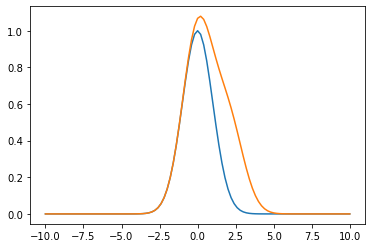

In [136]:
x = np.linspace(-10,10,101)
y = np.exp(-(x)**2/(2*1**2))
y1 = y + 0.5*np.exp(-(x-2)**2/(2*1**2))
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x,y1)
from scipy.stats import skew
print(skew(y), skew(y1))